#Wine Quality Prediction with Ensemble Learning

##Dataset Overview:
The dataset used in this code represents various attributes of red wine samples, such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. The 'quality' column is the target variable, and it categorizes wines into quality levels.

##Code Overview:
This Python script utilizes machine learning techniques, specifically ensemble learning methods, to predict the quality of red wines based on their attributes. Three ensemble learning models are implemented: Decision Tree Classifier, Bagging Classifier, and Random Forest Classifier. Additionally, hyperparameter tuning is performed using GridSearchCV to optimize the Random Forest Classifier.

##Steps:
1. Loading and exploring the wine dataset.
2. Preprocessing and splitting the dataset into training and testing sets.
3. Implementing a Decision Tree Classifier and evaluating its performance.
4. Employing a Bagging Classifier and assessing its impact on model performance.
5. Utilizing a Random Forest Classifier and fine-tuning its hyperparameters with GridSearchCV.
6. Visualizing decision boundaries for the Random Forest Classifier.
7. Displaying classification reports for each model and analyzing feature importances.



In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline

In [16]:
# Read the 'winequality-red.csv' file into a Pandas DataFrame
wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv',
                   sep=';',
                   error_bad_lines=False,
                   engine='python')

# Display the DataFrame to inspect the loaded data
wine

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

Data Visualization

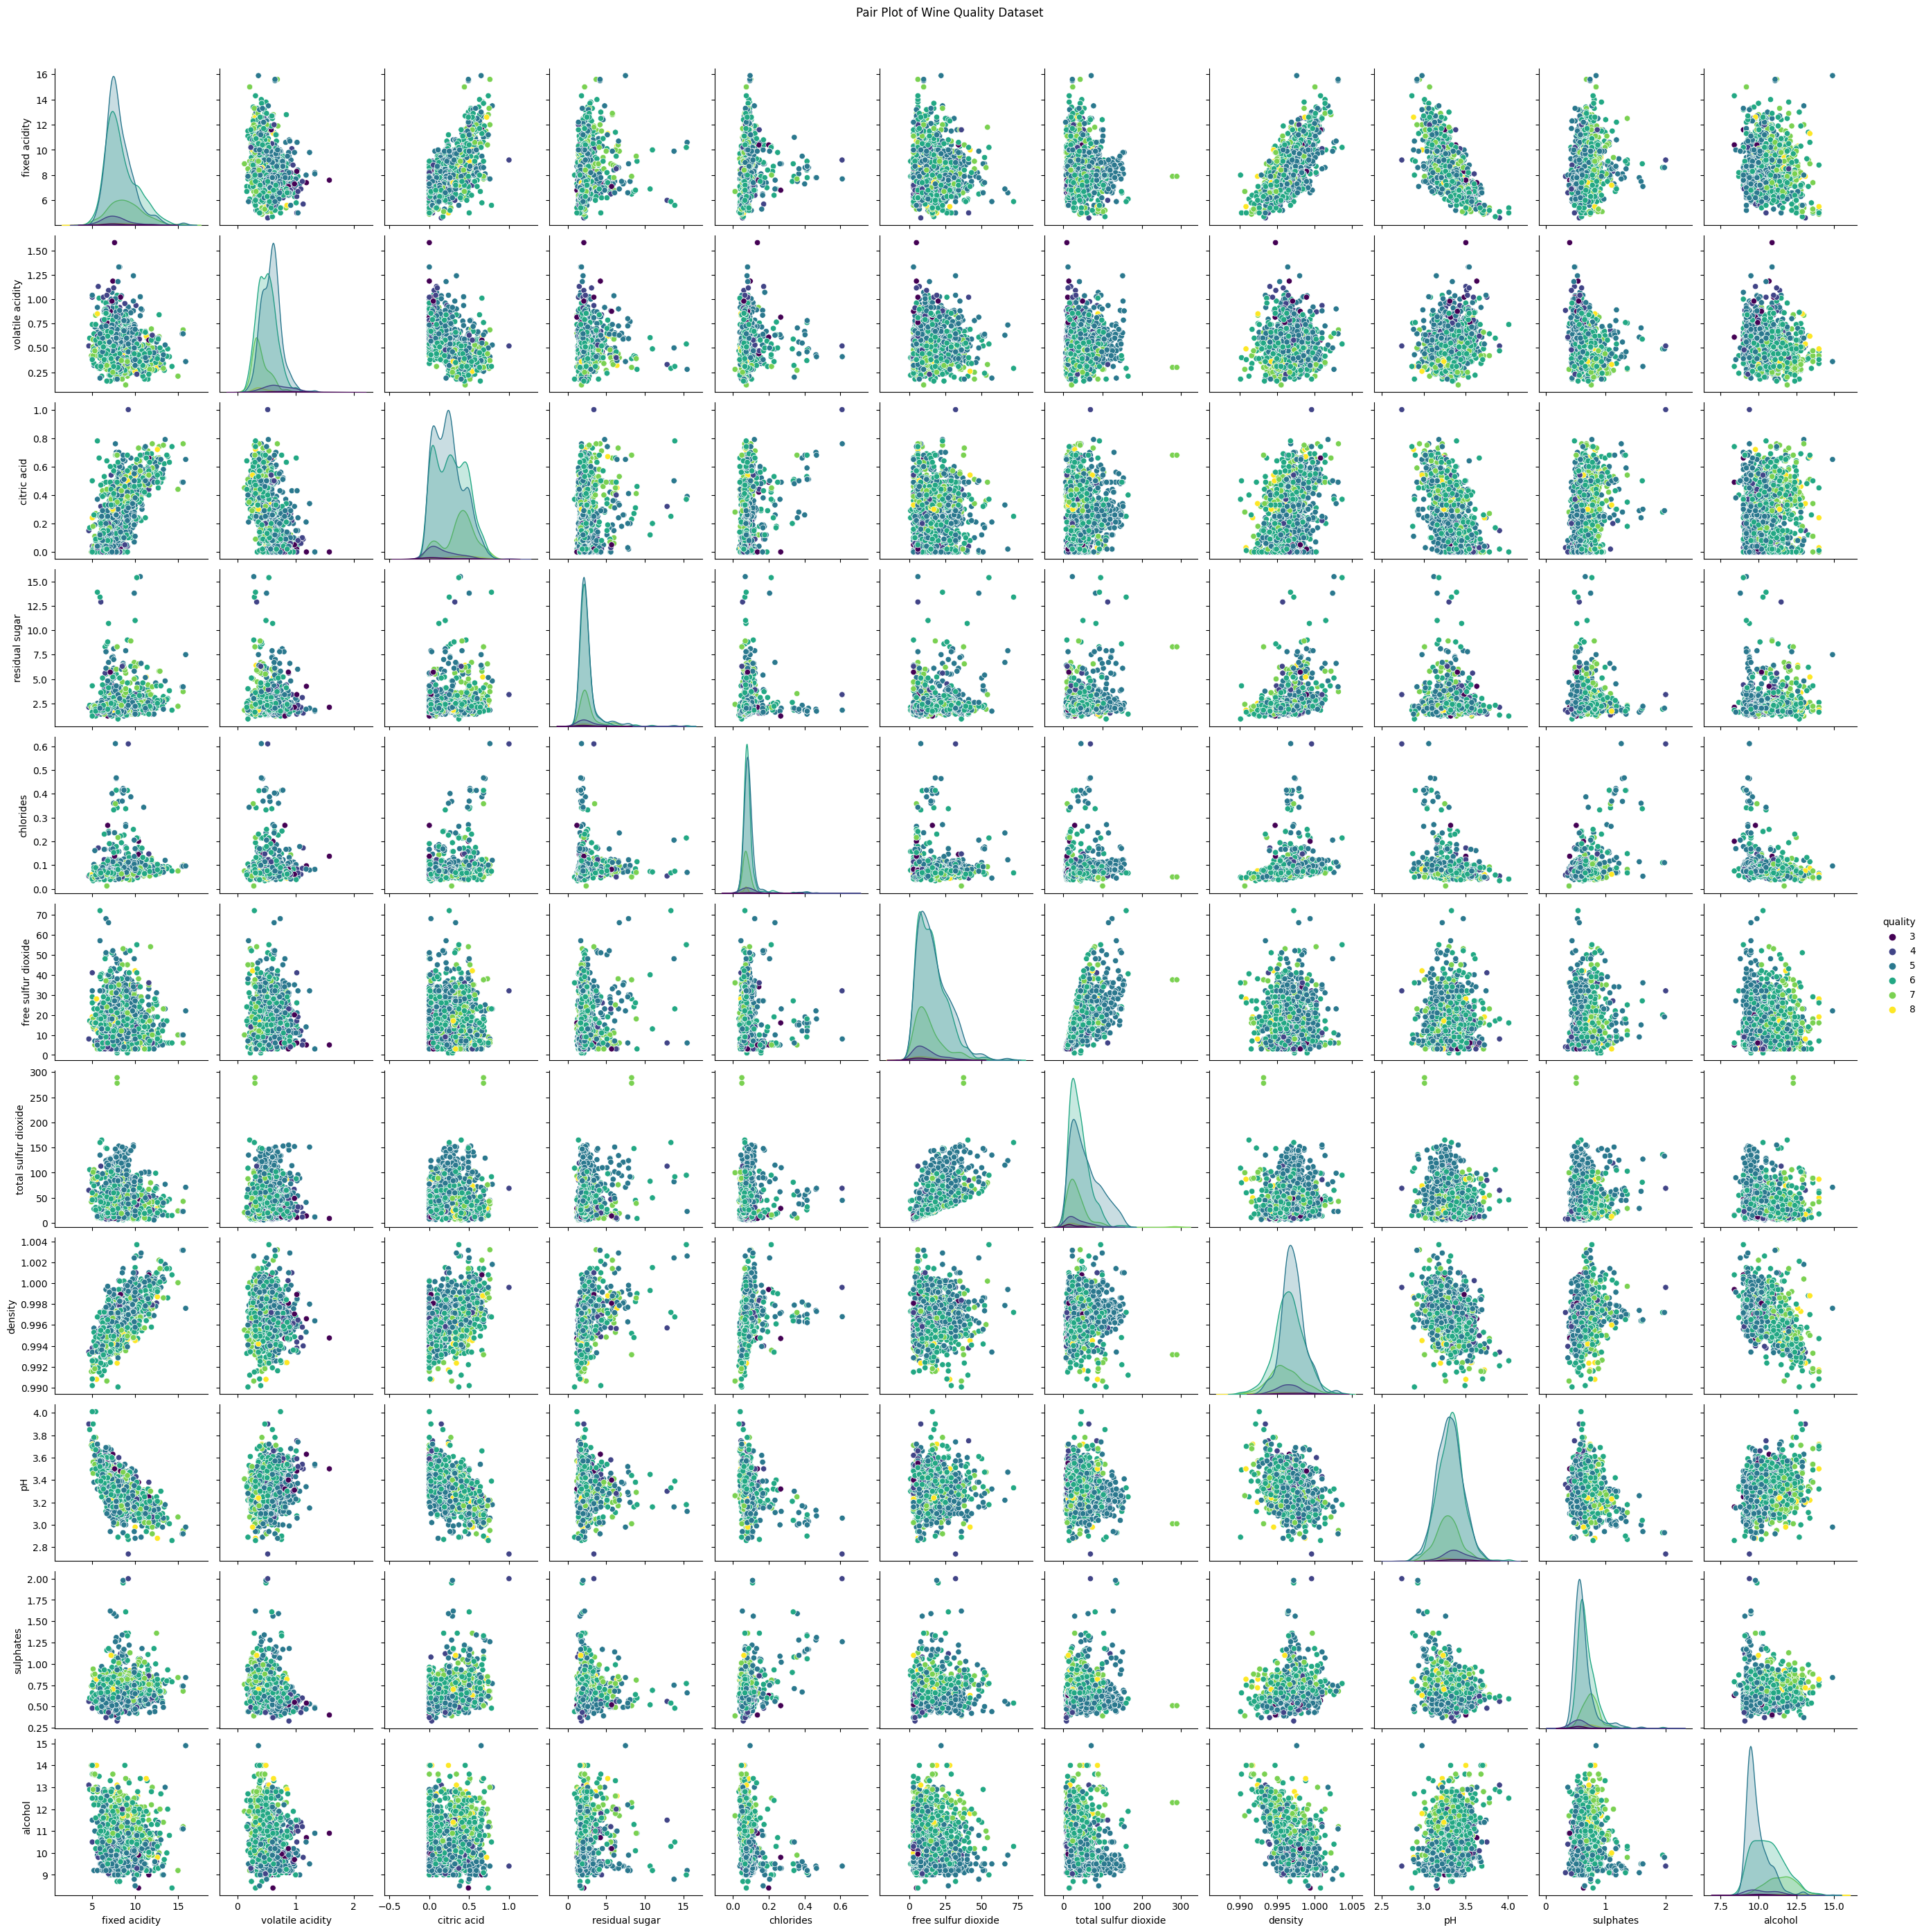

In [17]:
# Pair plot to visualize relationships between features
sns.pairplot(wine, hue='quality', palette='viridis', markers='o')
plt.suptitle("Pair Plot of Wine Quality Dataset", y=1.02)
plt.show()

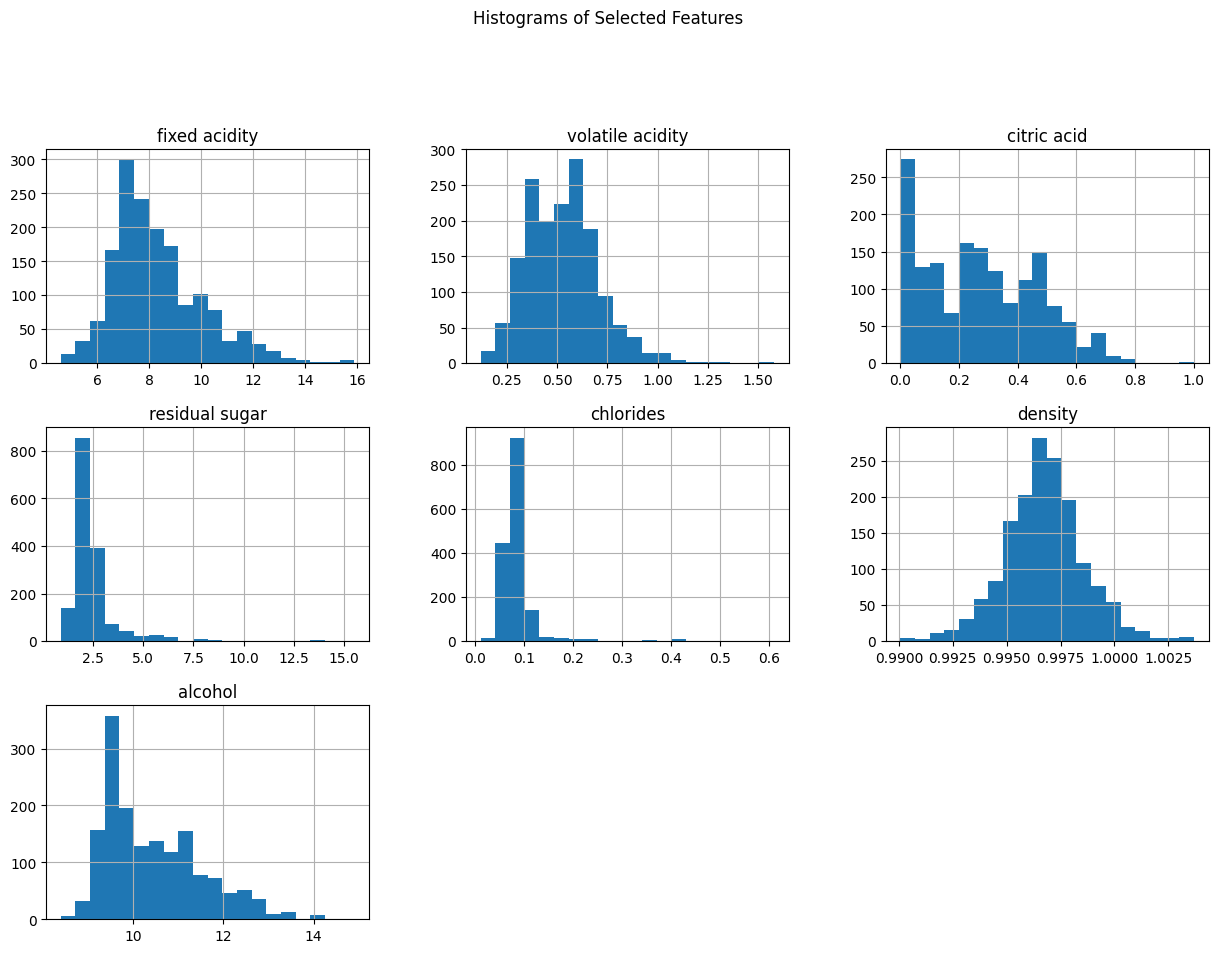

In [26]:
# Histograms for selected features
selected_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "alcohol"]
wine[selected_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Selected Features", y=1.02)
plt.show()

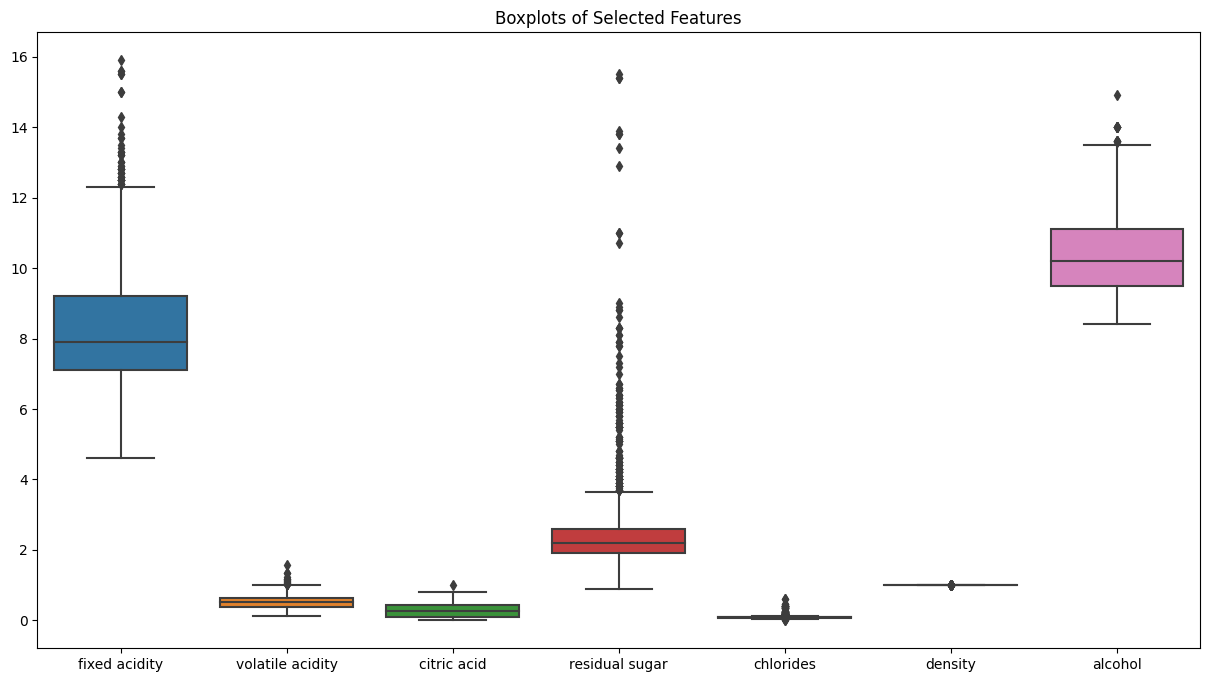

In [27]:
# Boxplots for selected features
plt.figure(figsize=(15, 8))
sns.boxplot(data=wine[selected_features])
plt.title("Boxplots of Selected Features")
plt.show()

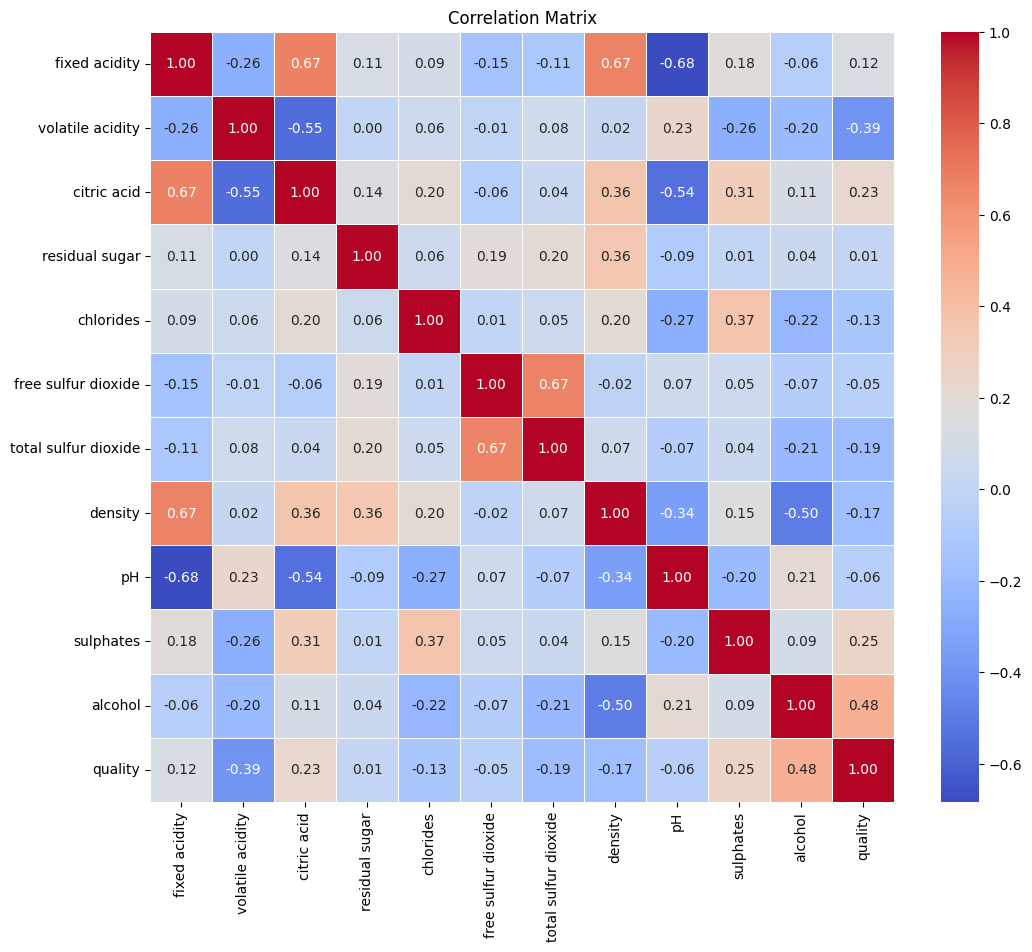

In [25]:
# Correlation matrix
correlation_matrix = wine.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

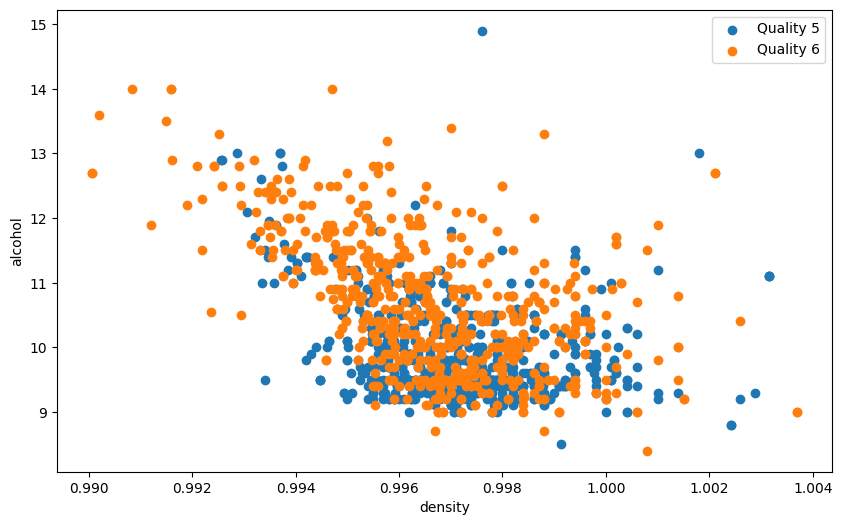

In [4]:
# Extract the 'density' and 'alcohol' columns as features (X) and the 'quality' column as the target variable (y)
X = wine[['density', 'alcohol']].to_numpy()
y = wine["quality"].to_numpy()

# Set the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for quality level 5, with 'density' on the x-axis and 'alcohol' on the y-axis
plt.scatter(X[y == 5][:, 0], X[y == 5][:, 1], label='Quality 5')

# Scatter plot for quality level 6, with 'density' on the x-axis and 'alcohol' on the y-axis
plt.scatter(X[y == 6][:, 0], X[y == 6][:, 1], label='Quality 6')

# Set labels for the x and y axes
plt.xlabel('density')
plt.ylabel('alcohol')

# Add a legend to distinguish quality levels
plt.legend()

# Display the scatter plot
plt.show()

In [5]:
# Split the dataset into training and testing sets
# X represents the features, and y represents the target variable
# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

Random Forest

In [6]:
# Initialize a RandomForestClassifier
clf = RandomForestClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Evaluate the accuracy of the classifier on the test set
accuracy = clf.score(X_test, y_test)

# Print the accuracy score
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


Bagging

In [7]:
# Initialize individual classifiers
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

# Create a VotingClassifier that combines the three classifiers using hard voting
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('mlp', mlp_clf),
    ('rf', rand_clf)
], voting="hard")

# The 'hard' voting strategy uses the majority class label as the final prediction

In [8]:
# Import the 'warnings' module to handle warnings during fitting
import warnings

# Ignore warnings to prevent them from being displayed in the output
warnings.filterwarnings('ignore')

# Fit the VotingClassifier on the training set
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

In [9]:
# Initialize a BaggingClassifier with a base estimator of DecisionTreeClassifier
# Use 500 base estimators (trees) in the ensemble
# Each tree is trained on a random subset of 100 samples drawn with replacement (bootstrap=True)
# Use all available CPU cores for parallel processing (n_jobs=-1)
bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1)

In [10]:
# Fit the BaggingClassifier on the training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [11]:
# Use the trained BaggingClassifier to make predictions on the test set
y_pred = bag_clf.predict(X_test)

In [12]:
# Calculate the accuracy score by comparing true labels (y_test) with predicted labels (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print or use the 'accuracy' variable as needed
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.56


In [13]:
print(f"Classification Report")
print(classification_report(y_test, y_pred), "\n")

Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.76      0.69       130
           6       0.52      0.55      0.53       132
           7       0.38      0.21      0.27        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.25      0.25      0.25       320
weighted avg       0.52      0.56      0.54       320
 



Comparison of Models

In [30]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Extract features and target variable
X = wine.drop("quality", axis=1).to_numpy()
y = wine["quality"].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print("Tree Classification Report:")
print(classification_report(y_test, tree_y_pred), "\n")

# Bagging Classifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=15, random_state=2),
                            n_estimators=500,
                            bootstrap=True,
                            n_jobs=-1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print("Bagging Classification Report:")
print(classification_report(y_test, bag_y_pred), "\n")

# Random Forest Classifier
forest_clf = RandomForestClassifier(max_depth=15, n_estimators=500,
                                    bootstrap=True,
                                    n_jobs=-1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, forest_y_pred), "\n")

# Feature Importance
names = wine.drop("quality", axis=1).columns
print("Feature Importances:")
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

Tree Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.06      0.06      0.06        16
           5       0.71      0.66      0.68       282
           6       0.55      0.63      0.58       243
           7       0.47      0.42      0.44        84
           8       0.00      0.00      0.00        10

    accuracy                           0.58       640
   macro avg       0.30      0.29      0.29       640
weighted avg       0.58      0.58      0.58       640
 

Bagging Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        16
           5       0.77      0.78      0.78       282
           6       0.60      0.72      0.66       243
           7       0.64      0.45      0.53        84
           8       0.00      0.00      0.00        10

    accuracy    

Hyperparameter Tuning

In [22]:
# Initialize a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [1, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate and print the accuracy score of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of the Best Model:", accuracy)

Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Accuracy Score of the Best Model: 0.6734375


#Conclusion

Based on the classification reports and the feature importances obtained from your models, here are some conclusions and observations:

### Decision Tree Classifier:

- The decision tree classifier shows an accuracy of approximately 58%, with varying precision, recall, and F1-scores across different classes.
- The model performs poorly on some classes (e.g., class 3, 8), indicating challenges in correctly predicting these categories.

### Bagging Classifier:

- The bagging classifier, which is an ensemble of decision trees, shows improved performance compared to the standalone decision tree.
- The accuracy increases to approximately 68%.
- Precision, recall, and F1-scores are more balanced across different classes, suggesting a better overall performance.

### Random Forest Classifier:

- The random forest classifier, another ensemble method, shows similar performance to the bagging classifier, with an accuracy of approximately 68%.
- Feature importances highlight the importance of features like "alcohol," "sulphates," and "volatile acidity" in making predictions.

### Random Forest with GridSearchCV:

- The best random forest model obtained after hyperparameter tuning with GridSearchCV, has a max depth of 30 and 200 estimators.
- The accuracy of the best model is approximately 67.3%, which is consistent with the bagging and random forest classifiers.

